In [1]:
## KEPLER MULTI-PLANET SYSTEM MASS & RADIUS UNIFORMITY
## Written by Sarah Millholland, October 2017

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pdb
import scipy
from scipy import stats
from astropy.io import ascii
import itertools
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
### HADDEN & LITHWICK DATA INFO

Title: Kepler Planet Masses and Eccentricities from TTV Analysis  
Authors: Hadden S., Lithwick Y. 
Table: Masses from TTVs
================================================================================
Byte-by-byte Description of file: ajaa71eft1_mrt.txt
--------------------------------------------------------------------------------
   Bytes Format Units     Label   Explanations
--------------------------------------------------------------------------------
   1- 13 A13    ---       Planet  Planet
  15- 15 I1     ---       robust  Robust flag (1)
  17- 23 F7.3   d         Per     Orbital period
  25- 28 F4.1   Rgeo      Rad     Planet radius
  30- 33 F4.2   Rgeo    E_Rad     1{sigma} upper error bound on Rad
  35- 38 F4.2   Rgeo    e_Rad     1{sigma} lower error bound on Rad
  40- 40 A1     ---     r_Rad     Source of planet-star radius ratio (2)
  42- 44 F3.1   solMass   Mstar   Mass of host star
  46- 49 F4.2   solMass E_Mstar   1{sigma} upper error bound on Mstar
  51- 54 F4.2   solMass e_Mstar   1{sigma} lower error bound on Mstar
  56- 56 I1     ---     l_Md      Md upper limit flag (3)
  58- 63 F6.2   Mgeo      Md      Planet mass from default prior
  65- 69 F5.2   Mgeo    E_Md      ?="" 1{sigma} upper error bound on Md
  71- 74 F4.2   Mgeo    e_Md      ?="" 1{sigma} lower error bound on Md
  76- 81 F6.2   g/cm3     rhod    Planet density from default prior
  83- 87 F5.2   g/cm3   E_rhod    ?="" 1{sigma} upper error bound on rhod
  89- 92 F4.2   g/cm3   e_rhod    ?="" 1{sigma} lower error bound on rhod
  94- 94 I1     ---     l_Mh      Mh upper limit flag (3)
  96-100 F5.1   Mgeo      Mh      Planet mass from high mass prior
 102-107 F6.2   Mgeo    E_Mh      ?="" 1{sigma} upper error bound on Md
 109-112 F4.2   Mgeo    e_Mh      ?="" 1{sigma} lower error bound on Md
 114-119 F6.2   g/cm3     rhoh    Planet density from high mass prior
 121-126 F6.2   g/cm3   E_rhoh    ?="" 1{sigma} upper error bound on rhod
 128-131 F4.2   g/cm3   e_rhoh    ?="" 1{sigma} lower error bound on rhod
 133-155 A23    ---       Ref     References (4)
--------------------------------------------------------------------------------
Note (1): Robust flag: 1 if planet mass inference is robust, 0 otherwise.
Note (2): Source of planet-star radius ratio --
    a = Borucki et al. (2011ApJ...736...19B);
    b = Fabrycky et al. (2012ApJ...750..114F);
    c = Masuda (2014ApJ...783...53M);
    d = Steffen et al. (2013MNRAS.428.1077S);
    e = Mills et al. (2016Natur.533..509M);
    f = Rowe et al. (2014ApJ...784...45R);
    g = Kepler KOI Q1-17 data release DR24, hosted on the Exoplanet Archive.
Note (3): Upper limit flag: 1 if Md, rhod, Mh, rhoh are consistent with 
          0 and 1{sigma} (68.3%) upper bounds are given, 0 otherwise.
Note (4): References for planets with masses previously inferred from N-body 
    TTV fits or RV observations --
    Bo14 = Borsato et al. (2014A&A...571A..38B);
    Ca12 = Carter et al. (2012Sci...337..556C);
    Co11 = Cochran et al. (2011ApJS..197....7C);
    Dr14 = Dreizler & Ofir (2014arXiv1403.1372D);
    Go16 = Gozdziewski et al. (2016MNRAS.455L.104G);
    Ha16 = Hadden & Lithwick (2016ApJ...828...44H);
    Hi12 = Hirano et al. (2012ApJ...759L..36H);
    Ho10 = Holman et. al. (2010Sci...330...51H);
    Hu13 = Huber et al. (2013Sci...342..331H);
    JH14 = Jontof-Hutter et al. (2014ApJ...785...15J);
    JH15a = Jontof-Hutter et al. (2015Natur.522..321J);
    JH16 = Jontof-Hutter et. al. (2016ApJ...820...39J);
    Li11 = Lissauer et. al. (2011Natur.470...53L);
    Li13 = Lissauer et. al. (2013ApJ...770..131L);
    Ma14 = Marcy et. al. (2014ApJS..210...20M);
    Mac16 = MacDonald et al. (2016AJ....152..105M);
    Mas13 = Masuda et al. (2013ApJ...778..185M);
    Mas14 = Masuda (2014ApJ...783...53M);
    Mi16 = Mills et. al. (2016Natur.533..509M);
    Mig12 = Migaszewski et al. (2012MNRAS.427..770M);
    Mig16 = Migaszewski et al. (2016MNRAS.458.2051M);
    SO12 = Sanchis-Ojeda et al. (2012Natur.487..449S);
    We13 = Weiss et al. (2013ApJ...768...14W).
--------------------------------------------------------------------------------

In [ ]:
### CKS DATA

# List of column names and description. Values with uncertainties are
# given as val + val_err1 - val_err2
id_starname           Unique identifier for star [str]
id_kic                Kepler Input Catalog Name [int]
id_koi                Kepler Object of Interest [int]		
id_koicand            Planet Candidate name K?????.?? [str]
id_tycho2             Tycho-2 identifier [int]
id_kepler_name        Kepler name [str]
tgas_parallax         Tycho-Gaia astrometric solution parallax [mas]
tgas_parallax_err1    
tgas_parallax_err2    
koi_disposition       Exoplanet Archive Disposition [str] 
# Columns from Q16 KOI catalog (Mullally et al. 2015)
koi_period            Orbital Period [days] 
koi_period_err1       Orbital Period Upper Unc. [days]
koi_period_err2       Orbital Period Lower Unc. [days]
koi_time0             Transit Epoch [BJD]
koi_time0_err1        
koi_time0_err2        
koi_impact            Impact Parameter [float]
koi_impact_err1       
koi_impact_err2       
koi_duration          Transit Duration [hrs]
koi_duration_err1     
koi_duration_err2     
koi_ingress           Ingress Duration [hrs]
koi_ingress_err1     
koi_ingress_err2     
koi_depth             Transit Depth [ppm]
koi_depth_err1        
koi_depth_err2        
koi_ror               Planet-Star Radius Ratio [float]
koi_ror_err1          
koi_ror_err2          
koi_srho              Fitted Stellar Density [g/cm**3]
koi_srho_err1         
koi_srho_err2	      
koi_prad              Planetary Radius [Earth radii]
koi_prad_err1         
koi_prad_err2         
koi_sma               Orbit Semi-Major Axis [AU]
koi_sma_err1
koi_sma_err2
koi_teq               Equilibrium Temperature [K]
koi_teq_err1          
koi_teq_err2          
koi_insol             Insolation Flux [Earth flux]
koi_insol_err1        
koi_insol_err2        
koi_dor               Planet-Star Distance over Star Radius [float]
koi_dor_err1          
koi_dor_err2          
koi_max_mult_ev       Maximum Multiple Event Statistic
koi_model_snr         Transit Signal-to-Noise
koi_count             Number of Planets
koi_num_transits      Number of Transits
koi_steff             Stellar Effective Temperature [K]
koi_steff_err1        
koi_steff_err2        
koi_slogg             Stellar Surface Gravity [log10(cm/s**2)]
koi_slogg_err1        
koi_slogg_err2        
koi_smet              Stellar Metallicity [dex]
koi_smet_err1         
koi_smet_err2         
koi_srad              Stellar Radius [Solar radii]
koi_srad_err1         
koi_srad_err2         
koi_smass             Stellar Mass [Solar mass]
koi_smass_err1        
koi_smass_err2        
koi_sage              Stellar Age [Gyr]
koi_sage_err1         
koi_sage_err2         
koi_sparprov          Stellar Parameter Provenance
kic_kepmag            Kepler-band [mag]
kic_jmag              J-band [mag]
kic_hmag              H-band [mag]
kic_kmag              K-band [mag]
# Columns from CKS-I
cks_fpsys	      CKS False positive designation for star/system
cks_fp                CKS False positive designation for candidate
cks_steff             CKS Effective Temperature [K]
cks_steff_err1        
cks_steff_err2        
cks_slogg             CKS Stellar Surface Gravity [log10(cm/s**2)]
cks_slogg_err1        
cks_slogg_err2        
cks_smet              CKS Stellar Metallicity [dex]
cks_smet_err1         
cks_smet_err2         
cks_svsini            CKS Projected Stellar Rotational Velocity [km/s]
cks_svsini_err1       
cks_svsini_err2       
# Columns from CKS-II
iso_steff             CKS+Isochrone-constrained Effective Temperature [K]
iso_steff_err1 	      
iso_steff_err2 	      
iso_slogg             CKS+Isochrone-constrained Stellar Surface Gravity [log10(cm/s**2)]
iso_slogg_err1 	      
iso_slogg_err2 	      
iso_smet              CKS+Isochrone-constrained Stellar Metallicity [dex]
iso_smet_err1 	      
iso_smet_err2 	      
iso_srad              CKS+Isochrone-constrained Stellar Radius [Solar radii]
iso_srad_err1 	      
iso_srad_err2 	      
iso_smass             CKS+Isochrone-constrained Stellar Mass [Solar mass]
iso_smass_err1 	      
iso_smass_err2	      
iso_sage              CKS+Isochrone-constrained Stellar Age [Gyr]
iso_sage_err1
iso_sage_err2	      
iso_slogage           CKS+Isochrone-constrained Stellar Age [log10(yrs)]
iso_slogage_err1	      
iso_slogage_err2	      
iso_sparallax         CKS+Isochrone-constrained Stellar parallax [mas]
iso_sparallax_err1    
iso_sparallax_err2    
iso_prad              CKS+Isochrone-constrained Planet Radius [Earth radii]
iso_prad_err1	      
iso_prad_err2	      
iso_sma               CKS+Isochrone-constrained semi-major axis [AU]
iso_sma_err1
iso_sma_err2
iso_insol             CKS+Isochrone-constrained Incident flux [Earth units]
iso_insol_err1	      
iso_insol_err2	      
iso_teq               CKS+Isochrone-constrained Planet equilibrium temperature (bond albedo = 0.3)
iso_teq_err1	      
iso_teq_err2	      

In [2]:
## READ HADDEN & LITHWICK (2017) DATA

filename = 'Hadden_Lithwick_2017_data'
table = ascii.read(filename)
robust = np.array(table['robust'])
planets = np.array(table['Planet'])
Mstar_HL = np.array(table['Mstar'])
P = np.array(table['Per'])
Rp_HL = np.array(table['Rad'])
Rp_low_HL = np.array(table['e_Rad'])
Rp_high_HL = np.array(table['E_Rad'])
Mp_d = np.array(table['Md']) # masses from default prior
Mp_d_low = np.array(table['e_Md'])
Mp_d_high = np.array(table['E_Md'])
Mp_h = np.array(table['Mh'])  # masses from high prior
Mp_h_low = np.array(table['e_Mh'])
Mp_h_high = np.array(table['E_Mh'])
rho_d = np.array(table['rhod'])   # densities from default prior
rho_d_low = np.array(table['e_rhod'])
rho_d_high = np.array(table['E_rhod'])


num_pl = len(planets)

## Check for agreement between default & high-mass estimates
## within a 2sigma range
def Overlap(x, y):
    # x and y are ranges
    overlap = max(0, min(x[1], y[1]) - max(x[0], y[0]))
    if overlap == 0:
        if (x[0] >= y[0]) & (x[0] <= y[1]):
            overlap = 1
        elif (y[0] >= x[0]) & (y[0] <= x[1]):
            overlap = 1
    return overlap
# Default mass 2sigma range
Mp_d1 = Mp_d - 2*Mp_d_low
Mp_d2 = Mp_d + 2*Mp_d_high
# High mass 2sigma range
Mp_h1 = Mp_h - 2*Mp_h_low
Mp_h2 = Mp_h + 2*Mp_h_high
agree = np.zeros(num_pl)
for i in range(num_pl):
    if Overlap([Mp_h1[i], Mp_h2[i]], [Mp_d1[i], Mp_d2[i]]) > 0:
        agree[i] = 1


##---------------------------------

## READ CKS DATA

filename = 'cks_physical_merged.csv'
table = np.genfromtxt(filename, delimiter = ',', names = True, dtype = None)
planets_CKS = table['id_kepler_name']
KOI_names_CKS = table['id_koicand']
Rp_CKS = table['iso_prad']
Rp_low_CKS = np.abs(table['iso_prad_err2'])
Rp_high_CKS = table['iso_prad_err1']
FeH_CKS = table['iso_smet']
Mstar_CKS = table['iso_smass']
Rstar_CKS = table['iso_srad']
vsini_CKS = table['cks_svsini']
star_age_CKS = table['iso_slogage']
a_CKS = table['iso_sma']

## MATCH HADDEN & LITHWICK AND CKS DATA
# 1) Loop through the planets in the Hadden & Lithwick sample.
# 2) Find the corresponding index in the CKS data.
# 3) If the index isn't there, use the HL stellar mass for Mstar,
#    set the other stellar parameters to NAN, and use the HL
#    planet radius.
# 4) Correct the HL masses by the new stellar mass.
# 5) For radii with a strong disagreement between HL and CKS 
#    radii, use the HL radii.

Rp = np.zeros(num_pl)
Rp_low = np.zeros(num_pl)
Rp_high = np.zeros(num_pl)
FeH = np.zeros(num_pl)
Mstar = np.zeros(num_pl)
Rstar = np.zeros(num_pl)
num_avail = 0  ## number of Hadden & Lithwick planets available in the CKS data
for i in range(num_pl):
    planet_HL = planets[i]
    # Find index of the planet in the CKS dataset
    index = np.where(planets_CKS == planet_HL)[0]
    if len(index) == 0:  ## Doesn't have a Kepler name
        index = np.where(KOI_names_CKS == planet_HL)[0]
        if len(index) == 0:  ## Doesn't have a KOI name
            index = np.nan
    #
    if np.isnan(index):
        Rp[i] = Rp_HL[i]  # use radius in HL17
        Rp_low[i] = Rp_low_HL[i] 
        Rp_high[i] = Rp_high_HL[i] 
        FeH[i] = np.nan   # no metallicity
        Mstar[i] = Mstar_HL[i]  # use Mstar in HL17
        Rstar[i] = 1.
    else:
        num_avail = num_avail + 1  ## Number of HL planets in the CKS data
        Rp[i] = Rp_CKS[index]
        Rp_low[i] = Rp_low_CKS[index]
        Rp_high[i] = Rp_high_CKS[index] 
        FeH[i] = FeH_CKS[index]
        Mstar[i] = Mstar_CKS[index]
        Rstar[i] = Rstar_CKS[index]
 


##--------------------------------
## RENAME THE HL17 PLANETS THAT HAVE KOI NAMES
## BUT NOT KEPLER NAMES. 
## The purpose of doing this is because we need
## to match up all the planets in a given system.
# K00841.03 --> Kepler-27
# K00115.03 --> Kepler-105
# K01563.03 --> Kepler-305
# K01831.03 --> Kepler-324
# K00332.02 --> Kepler-526
# K00427.01 --> Kepler-549
# K02162.02 --> Kepler-1126

planets[np.where(planets == 'K00841.03')] = 'Kepler-27'
planets[np.where(planets == 'K00115.03')] = 'Kepler-105'
planets[np.where(planets == 'K01563.03')] = 'Kepler-305'
planets[np.where(planets == 'K01831.03')] = 'Kepler-324'
planets[np.where(planets == 'K00332.02')] = 'Kepler-526'
planets[np.where(planets == 'K00427.01')] = 'Kepler-549'
planets[np.where(planets == 'K02162.02')] = 'Kepler-1126'


## GET THE INDICES OF EACH SYSTEM
sys_id = []
index = 0
sys_id.append(index)
sys_i = planets[0].split(' ')[0]
for i in range(num_pl-1):
    sys_ip1 = planets[i+1].split(' ')[0]
    if sys_ip1 == sys_i:
        sys_id.append(index)
    else:
        index = index + 1
        sys_id.append(index)
    sys_i = sys_ip1
sys_id = np.array(sys_id)  ## array of the system indices

## get the unique system indices
uniq_sys_id, uniq_indices = np.unique(sys_id, return_index = True)
num_sys = len(uniq_sys_id)

## CORRECT THE DENSITIES
rho_d = rho_d*(Rp_HL/Rp)**3

## CORRECT THE MASSES
Mp = (Mp_d/Mstar_HL)*Mstar

## CORRECT THE RADII THAT WERE DIFFERENT BY MORE THAN 100%
## Set the discrepant planet & all others in the system to the 
## Hadden & Lithwick radii
bad_indices = np.where(np.abs(Rp - Rp_HL)/Rp_HL > 1)[0]
bad_planets = planets[bad_indices]
for i in range(len(bad_planets)):
    for j in range(num_pl):
        if planets[j].split(' ')[0] == bad_planets[i].split(' ')[0]:
            Rp[j] = Rp_HL[j]
            Rp_low[j] = Rp_low_HL[j]
            Rp_high[j] = Rp_high_HL[j]


## IDENTIFY SYSTEMS FOR WHICH DEFAULT AND 
## HIGH MASS ESTIMATES AGREE FOR ALL PLANETS
## IN THE SYSTEM
sys_agree = np.zeros(num_sys)
indices_agree = []
for i in range(num_sys):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    if np.sum(agree[indices]) == len(indices):
        ## "default" and "high" mass estimates agree 
        ## for all planets in the system 
        sys_agree[i] = 1
        indices_agree.append(indices)
        
## indices_agree is the array of indices of planets
## for which all in its system agree
indices_agree = np.concatenate(indices_agree)
planets = planets[indices_agree]
P = P[indices_agree]
Rp = Rp[indices_agree]
Rp_low = Rp_low[indices_agree]
Rp_high = Rp_high[indices_agree]
Mp = Mp[indices_agree]
Mp_d_low = Mp_d_low[indices_agree]
Mp_d_high = Mp_d_high[indices_agree]
Mstar = Mstar[indices_agree]
Rstar = Rstar[indices_agree]
FeH = FeH[indices_agree]
sys_id = sys_id[indices_agree]
uniq_sys_id = np.unique(sys_id)
num_sys = len(uniq_sys_id)
num_pl = len(planets)

## median mass uncertainties
med_Mp_low = np.median(Mp_d_low[np.nonzero(Mp_d_low)])
med_Mp_high = np.median(Mp_d_high[np.nonzero(Mp_d_high)])
print 'median low and high mass uncertainties = ', \
    med_Mp_low, med_Mp_high

## median radius uncertainties
med_Rp_low = np.median(Rp_low[~np.isnan(Rp_low)])
med_Rp_high = np.median(Rp_high[~np.isnan(Rp_high)])
print 'median low and high radius uncertainties = ', \
    med_Rp_low, med_Rp_high


##---------------------------------

## SYSTEM PROPERTIES
median_Rp = np.zeros(num_sys)
median_Mp = np.zeros(num_sys)
sys_FeH = np.zeros(num_sys)
sys_Mstar = np.zeros(num_sys)

# number of systems of each multiplicity
num_2pl = 0
num_3pl = 0
num_4pl = 0
num_5pl = 0

## LOOP THROUGH SYSTEMS
for i in range(num_sys):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    if len(indices) == 2: num_2pl += 1
    elif len(indices) == 3: num_3pl += 1
    elif len(indices) == 4: num_4pl += 1
    elif len(indices) == 5: num_5pl += 1
    
    median_Rp[i] = np.median(Rp[indices])
    median_Mp[i] = np.median(Mp[indices])
    sys_FeH[i] = FeH[indices[0]]
    sys_Mstar[i] = Mstar[indices[0]]

print 'number of planets:', num_pl
print 'number of systems:', num_sys
print 'number of systems of each multiplicity:'
print 'Two:', num_2pl
print 'Three:', num_3pl
print 'Four:', num_4pl
print 'Five:', num_5pl


median low and high mass uncertainties =  0.7 1.5
median low and high radius uncertainties =  0.321100395 0.331723779
number of planets: 89
number of systems: 37
number of systems of each multiplicity:
Two: 26
Three: 8
Four: 2
Five: 1


In [6]:
### M/R DIAGRAM DISPERSION
### See equation 1 of Millholland, Wang, Laughlin (2017)

## DISPERSION METRIC FOR INDIVIDUAL SYSTEMS
def Tot_Dist_xy_Diag_individ(P, x, y, normed = True):
    ## LOOP THROUGH SYSTEMS 
    ## GET SUM OF DISTANCES IN X-Y DIAGRAM, WITH SORTING
    ## ACCORDING TO P.
    ## "normed" distances if it is divided by the total 
    ## number of planets in each system
    dist_xy_diag = np.zeros(num_sys)
    dist_xy_diag_x = np.zeros(num_sys)
    dist_xy_diag_y = np.zeros(num_sys)
    for i in range(num_sys):
        indices = np.where(sys_id == uniq_sys_id[i])[0]

        # Sort according to P
        P_i = P[indices]
        indices = indices[np.argsort(P_i)]
        x_i = x[indices]
        y_i = y[indices]

        # Get distance in x/y space from one planet to the next
        tot_dist = 0
        x_dist = 0
        y_dist = 0
        for j in range(len(indices)-1):   ## Planet j to planet j+1
            pt0 = np.array([x_i[j], y_i[j]])
            pt1 = np.array([x_i[j+1], y_i[j+1]])
            vec = pt1 - pt0
            tot_dist = tot_dist + np.sqrt(np.sum(vec**2))
            x_dist = x_dist + np.abs(pt1-pt0)[0]
            y_dist = y_dist + np.abs(pt1-pt0)[1]
        if normed:  ## Normed distances divide by the number of planets
            dist_xy_diag[i] = tot_dist/len(indices)
            dist_xy_diag_x[i] = x_dist/len(indices)
            dist_xy_diag_y[i] = y_dist/len(indices)
        else:
            dist_xy_diag[i] = tot_dist
            dist_xy_diag_x[i] = x_dist
            dist_xy_diag_y[i] = y_dist

    return dist_xy_diag, dist_xy_diag_x, dist_xy_diag_y

## DISPERSION METRIC FOR ALL SYSTEMS TOGETHER
def Tot_Dist_xy_Diag(P, x, y):
    dist_xy_diag_individ, dist_xy_diag_x_individ, dist_xy_diag_y_individ = \
        Tot_Dist_xy_Diag_individ(P, x, y, normed = False)
    tot_dist_xy_diag = np.sum(dist_xy_diag_individ)
    tot_dist_xy_diag_x = np.sum(dist_xy_diag_x_individ)
    tot_dist_xy_diag_y = np.sum(dist_xy_diag_y_individ)
    return tot_dist_xy_diag, tot_dist_xy_diag_x, tot_dist_xy_diag_y
        

###--------------------------------------------------------------------------------

    
## DISTANCE BETWEEN REAL PLANETS IN THE logM/logR DIAGRAM
dist_MR_diag, dist_MR_diag_R, dist_MR_diag_M = Tot_Dist_xy_Diag(P, np.log10(Rp), np.log10(Mp))

## DISTANCES BETWEEN RANDOM PLANETS IN THE logM/logR DIAGRAM
num_trials = 50000
dist_MR_diag_rand = np.zeros(num_trials)
dist_MR_diag_R_rand = np.zeros(num_trials)
dist_MR_diag_M_rand = np.zeros(num_trials)
for i in range(num_trials):  ## loop through random trials
    index_shuffle = np.random.permutation(np.arange(num_pl))
    Rp_rand = Rp[index_shuffle]
    Mp_rand = Mp[index_shuffle]
    dist_MR_diag_rand[i], dist_MR_diag_R_rand[i], dist_MR_diag_M_rand[i] = \
        Tot_Dist_xy_Diag(P, np.log10(Rp_rand), np.log10(Mp_rand))
 


50000
total distance: n_sigma =  -8.41960832475
R component: n_sigma =  -5.22856169901
M component: n_sigma =  -7.66543720754


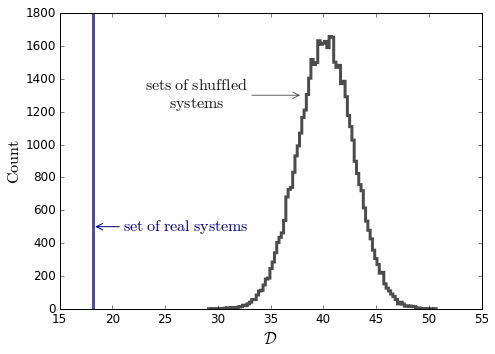

In [7]:
## PLOT HISTOGRAM OF DISPERSION METRICS

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
plt.hist(dist_MR_diag_rand, bins = 100, range = (min(dist_MR_diag_rand), max(dist_MR_diag_rand)), \
         color = 'k', alpha = 0.7, histtype = 'step', linewidth = 3);
plt.axvline(dist_MR_diag, color = 'darkblue', linewidth = 3, alpha = 0.7)
plt.xlabel(r'$\mathcal{D}$', fontsize = 16)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
ax.annotate(r'$\mathrm{set \ of \ real \ systems}$', color = 'darkblue', fontsize = 16, xy=(dist_MR_diag, 500), xycoords = 'data', \
            xytext=(27, 500), horizontalalignment = 'center', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'darkblue'))
ax.annotate(r'$\mathrm{sets \ of \ shuffled}$' + '\n' + r'$\mathrm{systems}$', color = 'k', alpha = 0.9,\
            fontsize = 16, xy=(38, 1300), xycoords = 'data', \
            xytext=(28, 1300), horizontalalignment = 'center', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'k', alpha = 0.6,))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.tight_layout()

print len(dist_MR_diag_rand)
print 'total distance: n_sigma = ', (dist_MR_diag - np.mean(dist_MR_diag_rand))/np.std(dist_MR_diag_rand)
print 'R component: n_sigma = ', (dist_MR_diag_R - np.mean(dist_MR_diag_R_rand))/np.std(dist_MR_diag_R_rand)
print 'M component: n_sigma = ', (dist_MR_diag_M - np.mean(dist_MR_diag_M_rand))/np.std(dist_MR_diag_M_rand)

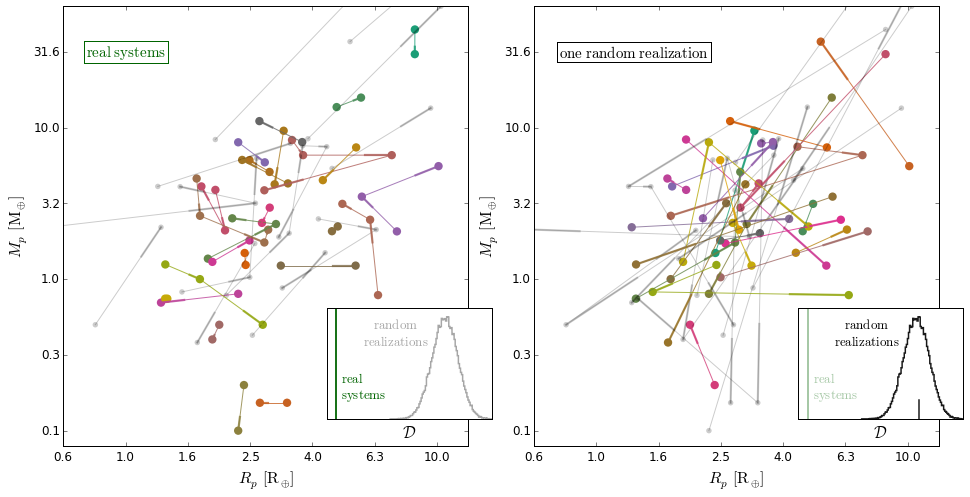

In [11]:
## PLOT FIGURE 2 -- DIRECTED GRAPHS
 
    
fig = plt.figure(figsize = (13.5, 7))

### REAL SYSTEMS 
ax = fig.add_subplot(121)

low = 0  
high = num_sys 

## Distances for each system individually
dist_MR_diag_individ, dist_MR_diag_x_individ, dist_xy_diag_y_individ = \
    Tot_Dist_xy_Diag_individ(P, np.log10(Rp), np.log10(Mp), normed = True)

num_colors = 25
index_colors = np.argsort(dist_MR_diag_individ)[0:num_colors]

for i in np.arange(low, high):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    P_i = P[indices]
    indices = indices[np.argsort(P_i)]
    Rp_i = Rp[indices]
    Mp_i = Mp[indices]
    cmap_name = 'Dark2'
    # good options: Dark2, Set1, nipy_spectral, spectral
    
    # directed graph dots
    if i in index_colors:
        plt.scatter(np.log10(Rp_i), np.log10(Mp_i), c = uniq_sys_id[i]*np.ones(len(Rp_i)), \
                vmin = uniq_sys_id[low], vmax = uniq_sys_id[high-1], s = 70, \
                cmap = cmap_name, edgecolor = 'none')
    else:
        plt.scatter(np.log10(Rp_i), np.log10(Mp_i), c = 'k', s = 30, alpha = 0.2, edgecolor = 'none')
    cmap = matplotlib.cm.get_cmap(cmap_name)
    if i in index_colors:
        color = cmap(uniq_sys_id[i]*1./uniq_sys_id[high-1])
        alpha = 0.8
    else: 
        color = 'k'
        alpha = 0.2
        
    # directed graph lines
    plt.plot(np.log10(Rp_i), np.log10(Mp_i), color = color, alpha = alpha)
    for j in range(len(Rp_i)-1):
        t = 0.7
        plt.plot([np.log10(Rp_i[j]) + t*(np.log10(Rp_i[j+1])-np.log10(Rp_i[j])), np.log10(Rp_i[j+1])], \
                 [np.log10(Mp_i[j]) + t*(np.log10(Mp_i[j+1])-np.log10(Mp_i[j])), np.log10(Mp_i[j+1])], \
                 linewidth = 2.2, color = color, alpha = alpha)


plt.xlabel(r'$R_p \ \mathrm{[R_{\oplus}]}$', fontsize = 16)
plt.ylabel(r'$M_p \ \mathrm{[M_{\oplus}]}$', fontsize = 16)

plt.xlim(-0.2, 1.1)
plt.ylim(-1.1, 1.8)

ax.set_xticklabels([np.round(10**x, 1) for x in ax.get_xticks()]);
ax.set_yticklabels([np.round(10**ax.get_yticks()[0], 2)] + \
                    [np.round(10**y, 1) for y in ax.get_yticks()[1:]]);

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.text(0, 1.5, r'$\mathrm{real \ systems}$', \
         horizontalalignment = 'center', verticalalignment = 'center', \
         fontsize = 15, alpha = 1., color = 'darkgreen', \
         bbox=dict(facecolor='white', edgecolor='darkgreen'))

### INSET HISTOGRAM
ax_inset = plt.axes([0.34, 0.16, 0.17, 0.22])
plt.hist(dist_MR_diag_rand, bins = 100, range = (min(dist_MR_diag_rand), max(dist_MR_diag_rand)), \
         color = 'k', alpha = 0.35, histtype = 'step', linewidth = 1.5);
plt.xlim(dist_MR_diag - 2, max(dist_MR_diag_rand) - 1)
plt.axvline(dist_MR_diag, color = 'darkgreen', linewidth = 2, alpha = 0.9)
plt.annotate(r'$\mathrm{real}$' + '\n' + r'$\mathrm{systems}$', color = 'darkgreen', fontsize = 13, xy=(dist_MR_diag, 500), xycoords = 'data', \
            xytext=(dist_MR_diag + 1, 500), horizontalalignment = 'left', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'darkgreen', alpha = 0))
plt.annotate(r'$\mathrm{random}$' + '\n' + r'$\mathrm{realizations}$', color = 'k', alpha = 0.35,\
            fontsize = 13, xy=(dist_MR_diag + 11, 1400), xycoords = 'data', \
            xytext=(dist_MR_diag + 12, 1400), horizontalalignment = 'center', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'k', alpha = 0))
plt.xlabel(r'$\mathcal{D}$', fontsize = 16)
plt.xticks([])
plt.yticks([])


###--------------------------------------------------------------------------------

### ONE RANDOM REALIZATION
ax = fig.add_subplot(122)

index_shuffle = np.random.permutation(np.arange(num_pl))
Rp_rand = Rp[index_shuffle]
Mp_rand = Mp[index_shuffle]

## Distances for each system individually
dist_MR_diag_individ_rand, dist_MR_diag_R_individ_rand, dist_MR_diag_M_individ_rand = \
    Tot_Dist_xy_Diag_individ(P, np.log10(Rp_rand), np.log10(Mp_rand))
## Composite distance
dist_MR_diag_rand_real, dist_MR_diag_R_rand_real, dist_MR_diag_M_rand_real = \
    Tot_Dist_xy_Diag(P, np.log10(Rp_rand), np.log10(Mp_rand))


num_colors = 25
index_colors = np.argsort(dist_MR_diag_individ_rand)[0:num_colors]

for i in np.arange(low, high):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    P_i = P[indices]
    indices = indices[np.argsort(P_i)]
    Rp_i = Rp_rand[indices]
    Mp_i = Mp_rand[indices]
    cmap_name = 'Dark2'
    # good options: Dark2, Set1, nipy_spectral, spectral
    
    # directed graph dots
    if i in index_colors:
        plt.scatter(np.log10(Rp_i), np.log10(Mp_i), c = uniq_sys_id[i]*np.ones(len(Rp_i)), \
                vmin = uniq_sys_id[low], vmax = uniq_sys_id[high-1], s = 70, \
                cmap = cmap_name, edgecolor = 'none')
    else:
        plt.scatter(np.log10(Rp_i), np.log10(Mp_i), c = 'k', s = 30, alpha = 0.2, edgecolor = 'none')
    cmap = matplotlib.cm.get_cmap(cmap_name)
    if i in index_colors:
        color = cmap(uniq_sys_id[i]*1./uniq_sys_id[high-1])
        alpha = 0.8
    else: 
        color = 'k'
        alpha = 0.2
        
    # directed graph lines
    plt.plot(np.log10(Rp_i), np.log10(Mp_i), color = color, alpha = alpha)
    for j in range(len(Rp_i)-1):
        t = 0.7
        plt.plot([np.log10(Rp_i[j]) + t*(np.log10(Rp_i[j+1])-np.log10(Rp_i[j])), np.log10(Rp_i[j+1])], \
                 [np.log10(Mp_i[j]) + t*(np.log10(Mp_i[j+1])-np.log10(Mp_i[j])), np.log10(Mp_i[j+1])], \
                 linewidth = 2.2, color = color, alpha = alpha)

        
plt.xlabel(r'$R_p \ \mathrm{[R_{\oplus}]}$', fontsize = 16)
plt.ylabel(r'$M_p \ \mathrm{[M_{\oplus}]}$', fontsize = 16)

plt.xlim(-0.2, 1.1)
plt.ylim(-1.1, 1.8)

ax.set_xticklabels([np.round(10**x, 1) for x in ax.get_xticks()]);
ax.set_yticklabels([np.round(10**ax.get_yticks()[0], 2)] + \
                           [np.round(10**y, 1) for y in ax.get_yticks()[1:]]);

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.text(0.12, 1.5, r'$\mathrm{one \ random \ realization}$', \
         horizontalalignment = 'center', verticalalignment = 'center', \
         fontsize = 15, alpha = 1., \
         bbox=dict(facecolor='white', edgecolor='black'))

### INSET HISTOGRAM
ax_inset = plt.axes([0.825, 0.16, 0.17, 0.22])
plt.hist(dist_MR_diag_rand, bins = 100, range = (min(dist_MR_diag_rand), max(dist_MR_diag_rand)), \
         color = 'k', alpha = 0.9, histtype = 'step', linewidth = 1.5);
plt.plot([dist_MR_diag_rand_real, dist_MR_diag_rand_real], [0, 300], color = 'k', alpha = 0.9, linewidth = 1.5)
plt.xlim(dist_MR_diag - 2, max(dist_MR_diag_rand) - 1)
plt.axvline(dist_MR_diag, color = 'darkgreen', linewidth = 2, alpha = 0.35)
plt.annotate(r'$\mathrm{real}$' + '\n' + r'$\mathrm{systems}$', color = 'darkgreen', alpha = 0.35, fontsize = 13, xy=(dist_MR_diag, 500), xycoords = 'data', \
            xytext=(dist_MR_diag + 1, 500), horizontalalignment = 'left', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'darkgreen', alpha = 0))
plt.annotate(r'$\mathrm{random}$' + '\n' + r'$\mathrm{realizations}$', color = 'k', alpha = 1.,\
            fontsize = 13, xy=(dist_MR_diag + 11, 1400), xycoords = 'data', \
            xytext=(dist_MR_diag + 12, 1400), horizontalalignment = 'center', \
            verticalalignment = 'center', arrowprops=dict(arrowstyle='->', color = 'k', alpha = 0))
plt.xlabel(r'$\mathcal{D}$', fontsize = 16)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.subplots_adjust(right = 0.97)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


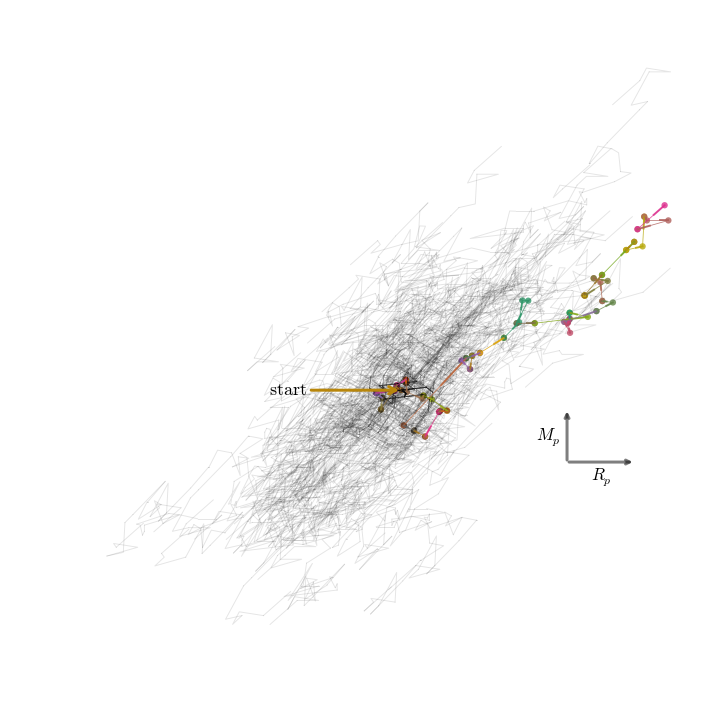

In [12]:
## PLOT FIGURE 3 -- RANDOM WALK


fig = plt.figure(figsize = (10, 10))

### FIRST HALF
ax = fig.add_subplot(111)

low = 0  
high = len(uniq_sys_id) 
sort_uniq_sys_id = uniq_sys_id[np.argsort(sys_Mstar)]


### RANDOMIZED SYSTEMS
num_trials = 100
for j in range(num_trials):
    #
    logRp_last = 0
    logMp_last = 0
    #
    Rp_rand = np.array([])
    Mp_rand = np.array([])
    for n in range(num_sys):  ## LOOP THROUGH SYSTEMS
        ## Randomize the order of planets in each system
        indices = np.where(sys_id == sort_uniq_sys_id[n])[0]
        Rp_n = Rp[indices]
        Mp_n = Mp[indices]
        index_shuffle = np.random.permutation(np.arange(len(indices)))
        Rp_i = Rp_n[index_shuffle]
        Mp_i = Mp_n[index_shuffle]
        # Translation 
        trans_logRp_i = np.log10(Rp_i) - np.log10(Rp_i[0]) + logRp_last
        trans_logMp_i = np.log10(Mp_i) - np.log10(Mp_i[0]) + logMp_last
        plt.plot(trans_logRp_i, trans_logMp_i, color = 'k', alpha = 0.1)

        logRp_last = trans_logRp_i[-1]
        logMp_last = trans_logMp_i[-1]   
        
    
## REAL SYSTEMS
logRp_last = 0
logMp_last = 0
for i in np.arange(low, high):
    indices = np.where(sys_id == sort_uniq_sys_id[i])[0]
    P_i = P[indices]
    indices = indices[np.argsort(P_i)]
    Rp_i = Rp[indices]
    Mp_i = Mp[indices]
    cmap_name = 'Dark2'
    # good options: Dark2, Set1, nipy_spectral, spectral
    
    # Translation 
    trans_logRp_i = np.log10(Rp_i) - np.log10(Rp_i[0]) + logRp_last
    trans_logMp_i = np.log10(Mp_i) - np.log10(Mp_i[0]) + logMp_last
    plt.scatter(trans_logRp_i, trans_logMp_i, c = sort_uniq_sys_id[i]*np.ones(len(Rp_i)), \
                vmin = uniq_sys_id[low], vmax = uniq_sys_id[high-1], s = 40, alpha = 0.8, \
                cmap = cmap_name, edgecolor = 'none')
    cmap = matplotlib.cm.get_cmap(cmap_name)
    color = cmap(sort_uniq_sys_id[i]*1./uniq_sys_id[high-1])
    plt.plot(trans_logRp_i, trans_logMp_i, color = color, alpha = 0.8, linewidth = 0.8)
    for j in range(len(Rp_i)-1):
        t = 0.6
        plt.plot([trans_logRp_i[j] + t*(trans_logRp_i[j+1]-trans_logRp_i[j]), trans_logRp_i[j+1]], \
                 [trans_logMp_i[j] + t*(trans_logMp_i[j+1]-trans_logMp_i[j]), trans_logMp_i[j+1]], \
                 linewidth = 2, color = color, alpha = 0.8)
    logRp_last = trans_logRp_i[-1]
    logMp_last = trans_logMp_i[-1]
    
    

plt.axis('off')

ax.annotate('', xy=(2.2,-1.9), xycoords = 'data', \
            xytext=(3.1,-1.9), horizontalalignment = 'center', \
            verticalalignment = 'center', \
            arrowprops=dict(arrowstyle='<-', color = 'k', alpha = 0.5, linewidth = 3))
plt.text(2.65, -2.3, r'$R_p$', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 17)
ax.annotate('', xy=(2.2,-1.9), xycoords = 'data', \
            xytext=(2.2,-0.5), horizontalalignment = 'center', \
            verticalalignment = 'center', \
            arrowprops=dict(arrowstyle='<-', color = 'k', alpha = 0.5, linewidth = 3))
plt.text(1.95, -1.25, r'$M_p$', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 17)
ax.annotate(r'$\mathrm{start}$', xy=(0, 0), xycoords = 'data', \
            xytext=(-1.5, 0), horizontalalignment = 'center', \
            verticalalignment = 'center', color = 'k', fontsize = 18, \
            arrowprops=dict(arrowstyle='->', color = 'darkgoldenrod', linewidth = 3))


plt.tight_layout()

In [ ]:
### M/R DIAGRAM SIZE ORDERING METRIC --
### See equation 3 of Millholland, Wang, Laughlin (2017)

# Systems sorted according to Mstar
sort_uniq_sys_id = uniq_sys_id[np.argsort(sys_Mstar)]
P_sort = np.array([])
Rp_sort = np.array([])
Mp_sort = np.array([])
sys_id_sort = np.array([])
for i in range(num_sys):
    indices = np.where(sys_id == sort_uniq_sys_id[i])[0]
    P_sort = np.concatenate((P_sort, P[indices]))
    Rp_sort = np.concatenate([Rp_sort, Rp[indices]])
    Mp_sort = np.concatenate([Mp_sort, Mp[indices]])
    sys_id_sort = np.concatenate((sys_id_sort, sys_id[indices]))

def Vec_xy_diag(P, x, y):
    ## LOOP THROUGH SYSTEMS 
    ## GET SUM OF DISPLACEMENTS IN X-Y DIAGRAM, WITH PLANETS 
    ## SORTED ACCORDING TO P 
    vec_x = 0
    vec_y = 0
    for i in range(num_sys):  ## Loop through systems
        indices = np.where(sys_id_sort == sort_uniq_sys_id[i])[0]

        # Sort according to the period
        P_i = P_sort[indices]
        indices = indices[np.argsort(P_i)]
        x_i = x[indices]
        y_i = y[indices]

        # Get vec in x/y space from one planet to the next
        for j in range(len(indices)-1): ## Loop through planets
            vec_x = vec_x + x_i[j+1] - x_i[j]
            vec_y = vec_y + y_i[j+1] - y_i[j]
    
    vec_norm = np.sqrt(np.sum(vec_x**2 + vec_y**2))
    return (vec_x, vec_y, vec_norm)
    

## DISTANCES BETWEEN RANDOM PLANETS IN THE logM/logR DIAGRAM
num_trials = 50000
vec_MR_x_rand = np.zeros(num_trials)
vec_MR_y_rand = np.zeros(num_trials)
norm_vec_MR_rand = np.zeros(num_trials)
for j in range(num_trials):  ## LOOP THROUGH RANDOM TRIALS
    Rp_rand = np.array([])
    Mp_rand = np.array([])
    for i in range(num_sys): ## LOOP THROUGH SYSTEMS
        ## Randomize the order of planets in each system
        indices = np.where(sys_id == sort_uniq_sys_id[i])[0]
        Rp_i = Rp[indices]
        Mp_i = Mp[indices]
        index_shuffle = np.random.permutation(np.arange(len(indices)))
        Rp_rand = np.concatenate((Rp_rand, Rp_i[index_shuffle]))
        Mp_rand = np.concatenate((Mp_rand, Mp_i[index_shuffle]))
    # Calculate ordering metrics
    vec_MR_x_rand[j], vec_MR_y_rand[j], norm_vec_MR_rand[j] = \
        Vec_xy_diag(P, np.log10(Rp_rand), np.log10(Mp_rand))
    

## VECTOR FOR REAL PLANETS IN THE logM/logR DIAGRAM
vec_MR_x, vec_MR_y, norm_vec_MR = Vec_xy_diag(P_sort, np.log10(Rp_sort), np.log10(Mp_sort))

In [ ]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
plt.hist(vec_MR_x_rand, bins = 50, range = (min(vec_MR_x_rand), max(vec_MR_x_rand)), \
         color = 'k', alpha = 0.7, histtype = 'step', linewidth = 3, label = r'$\mathcal{O}_R$');
plt.axvline(vec_MR_x, color = 'darkblue', linewidth = 3, alpha = 0.7)
plt.hist(vec_MR_y_rand, bins = 50, range = (min(vec_MR_y_rand), max(vec_MR_y_rand)), \
         color = 'k', linestyle = 'dotted', alpha = 1., histtype = 'step', linewidth = 3, label = r'$\mathcal{O}_M$');
plt.axvline(vec_MR_y, color = 'darkblue', linestyle = 'dotted', linewidth = 3, alpha = 1.)
plt.xlabel(r'$\mathcal{O}_R , \mathcal{O}_M$', fontsize = 16)
plt.ylabel(r'$\mathrm{Frequency}$', fontsize = 16)

plt.legend(fontsize = 16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.tight_layout()

print 'R component: n_sigma = ', (vec_MR_x - np.mean(vec_MR_x_rand))/np.std(vec_MR_x_rand)
print 'M component: n_sigma = ', (vec_MR_y - np.mean(vec_MR_y_rand))/np.std(vec_MR_y_rand)

In [ ]:
## SUPPLEMENTARY MATERIAL -- examine intra-system dispersion
## in mass and radius

## Three different measures of intra-system dispersion
## in mass, radius, and density:
## 1) Standard deviation within the system divided by 
##    standard deviation of an equal number of planets 
##    pulled randomly from the population. 
## 2) Median absolute deviation (MAD) normalized by 
##    that of planets from the population.
## 3) Coefficient of Variation (CV) normalized by 
##    that of planets from the population.

## Ratio of masses and radii of adjacent planets in systems
## normalized by ratios of pairs of planets pulled randomly 
## from the population.

num_pert = 1000

# std
# Rp
mean_Rp = np.zeros(num_sys)
std_Rp = np.zeros(num_sys)
std_Rp_rand = np.zeros((num_sys, num_pert))
# Mp
mean_Mp = np.zeros(num_sys)
std_Mp = np.zeros(num_sys)
std_Mp_rand = np.zeros((num_sys, num_pert))
# rho
mean_rho = np.zeros(num_sys)
std_rho = np.zeros(num_sys)
std_rho_rand = np.zeros((num_sys, num_pert))

# MAD
# Rp
MAD_Rp = np.zeros(num_sys)
MAD_Rp_rand = np.zeros((num_sys, num_pert))
# Mp
MAD_Mp = np.zeros(num_sys)
MAD_Mp_rand = np.zeros((num_sys, num_pert))
# rho
MAD_rho = np.zeros(num_sys)
MAD_rho_rand = np.zeros((num_sys, num_pert))

# CV
# Rp
CV_Rp = np.zeros(num_sys)
CV_Rp_rand = np.zeros((num_sys, num_pert))
# Mp
CV_Mp = np.zeros(num_sys)
CV_Mp_rand = np.zeros((num_sys, num_pert))
# rho
CV_rho = np.zeros(num_sys)
CV_rho_rand = np.zeros((num_sys, num_pert))

# ratio adjacent
ratio_Rp = []
ratio_Rp_rand = np.zeros((num_sys, num_pert))
ratio_Mp = []
ratio_Mp_rand = np.zeros((num_sys, num_pert))

def MAD(x):  # median absolute deviation
    return np.median(np.abs(x - np.median(x)))

def rand_ratio(x):
    i1 = np.random.randint(low = 0, high = len(x)-1)
    i2 = i1
    while i2 == i1:
        i2 = np.random.randint(low = 0, high = len(x)-1)
    return x[i1]/x[i2]

## LOOP THROUGH SYSTEMS
for i in range(num_sys):
    indices = np.where(sys_id == uniq_sys_id[i])[0]
    
    # radius
    Rp_i = Rp[indices]
    mean_Rp[i] = np.mean(Rp_i)
    std_Rp[i] = np.std(Rp_i)
    MAD_Rp[i] = MAD(Rp_i)
    CV_Rp[i] = np.std(Rp_i)/np.mean(Rp_i)
    # radius ratio of adjacent planet pairs
    for k in range(len(indices)-1):  
        ratio_Rp.append(Rp_i[k+1]/Rp_i[k])
        
    # mass
    Mp_i = Mp[indices]
    mean_Mp[i] = np.mean(Mp_i)
    std_Mp[i] = np.std(Mp_i)
    MAD_Mp[i] = MAD(Mp_i)
    CV_Mp[i] = np.std(Mp_i)/np.mean(Mp_i)
    # mass ratio of adjacent planet pairs
    for k in range(len(indices)-1):
        ratio_Mp.append(Mp_i[k+1]/Mp_i[k])
        
    # rho
    rho_i = rho_d[indices]
    mean_rho[i] = np.mean(rho_i)
    std_rho[i] = np.std(rho_i)
    MAD_rho[i] = MAD(rho_i)
    CV_rho[i] = np.std(rho_i)/np.mean(rho_i)
        
    
    ## LOOP THROUGH RANDOM TRIALS FOR A GIVEN SYSTEM
    for j in range(num_pert):   
        rand_indices = np.random.choice(np.arange(num_pl), size = len(indices))  
        # Rp
        std_Rp_rand[i,j] = np.std(Rp[rand_indices])
        MAD_Rp_rand[i,j] = MAD(Rp[rand_indices])
        CV_Rp_rand[i,j] = np.std(Rp[rand_indices])/np.mean(Rp[rand_indices])
        ratio_Rp_rand[i,j] = rand_ratio(Rp)
        # Mp
        std_Mp_rand[i,j] = np.std(Mp[rand_indices])
        MAD_Mp_rand[i,j] = MAD(Mp[rand_indices])
        CV_Mp_rand[i,j] = np.std(Mp[rand_indices])/np.mean(Mp[rand_indices])
        ratio_Mp_rand[i,j] = rand_ratio(Mp)
        # rho
        std_rho_rand[i,j] = np.std(rho_d[rand_indices])
        MAD_rho_rand[i,j] = MAD(rho_d[rand_indices])
        CV_rho_rand[i,j] = np.std(rho_d[rand_indices])/np.mean(rho_d[rand_indices])
        
        
## Take median of random trials
std_Rp_rand = np.median(std_Rp_rand, axis = 1)
std_Mp_rand = np.median(std_Mp_rand, axis = 1)
std_rho_rand = np.median(std_rho_rand, axis = 1)

MAD_Rp_rand = np.median(MAD_Rp_rand, axis = 1)
MAD_Mp_rand = np.median(MAD_Mp_rand, axis = 1)
MAD_rho_rand = np.median(MAD_rho_rand, axis = 1)

CV_Rp_rand = np.median(CV_Rp_rand, axis = 1)
CV_Mp_rand = np.median(CV_Mp_rand, axis = 1)
CV_rho_rand = np.median(CV_rho_rand, axis = 1)

In [ ]:
plt.hist(std_Rp/std_Rp_rand, bins = 50, color = 'blue', alpha = 0.1, label = r'$R_p$');
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\sigma_{i}/\sigma_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Radius}$', fontsize = 16)

x = std_Rp/std_Rp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(CV_Rp/CV_Rp_rand, bins = 50, color = 'blue', alpha = 0.1, label = r'$R_p$');
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\mathrm{CV}_{i}/\mathrm{CV}_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Radius}$', fontsize = 16)

x = CV_Rp/CV_Rp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(MAD_Rp/MAD_Rp_rand, bins = 50, color = 'blue', alpha = 0.1, label = r'$R_p$', range = (0,5));
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\mathrm{MAD}_{i}/\mathrm{MAD}_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Radius}$', fontsize = 16)

x = MAD_Rp/MAD_Rp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(std_Mp/std_Mp_rand, bins = 50, color = 'k', alpha = 0.1, range = (0,6));
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\sigma_{i}/\sigma_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Mass}$', fontsize = 16)

x = std_Mp/std_Mp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(CV_Mp/CV_Mp_rand, bins = 50, color = 'k', alpha = 0.1);
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\mathrm{CV}_{i}/\mathrm{CV}_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Mass}$', fontsize = 16)

x = CV_Mp/CV_Mp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(MAD_Mp/MAD_Mp_rand, bins = 50, color = 'k', alpha = 0.1, range = (0,10));
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\mathrm{MAD}_{i}/\mathrm{MAD}_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Mass}$', fontsize = 16)

x = MAD_Mp/MAD_Mp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(std_rho/std_rho_rand, bins = 50, color = 'g', alpha = 0.1, range = (0,6));
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\sigma_{i}/\sigma_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Density}$', fontsize = 16)

x = std_rho/std_rho_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(CV_rho/CV_rho_rand, bins = 50, color = 'g', alpha = 0.1);
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\mathrm{CV}_{i}/\mathrm{CV}_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Density}$', fontsize = 16)

x = CV_rho/CV_rho_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
plt.hist(MAD_rho/MAD_rho_rand, bins = 50, color = 'g', alpha = 0.1, range = (0,6));
plt.axvline(1, linestyle = 'dashed', color = 'k')
plt.xlabel(r'$\mathrm{MAD}_{i}/\mathrm{MAD}_{\mathrm{rand}}$', fontsize = 17)
plt.ylabel(r'$\mathrm{Count}$', fontsize = 16)
plt.title(r'$\mathrm{Density}$', fontsize = 16)

x = MAD_Mp/MAD_Mp_rand
print 'proportion < 1 = ', len(x[x < 1])*1./len(x)


In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
plt.plot(FeH, Rp, 'o', alpha = 0.5)
plt.xlabel(r'$\mathrm{Fe/H}$', fontsize = 16)
plt.ylabel(r'$R_p \ \mathrm{[R_{\oplus}]}$', fontsize = 16)
ax.set_yscale('log')


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
plt.plot(FeH, Mp, 'ko', alpha = 0.7)
#plt.ylim(0,20)
plt.xlabel(r'$\mathrm{Fe/H}$', fontsize = 16)
plt.ylabel(r'$M_p \ \mathrm{[M_{\oplus}]}$', fontsize = 16)
ax.set_yscale('log')


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
plt.plot(Mstar, Rp, 'o', alpha = 0.5)
#plt.ylim(0,20)
plt.xlabel(r'$M_{\star}$', fontsize = 16)
plt.ylabel(r'$R_p \ \mathrm{[M_{\oplus}]}$', fontsize = 16)
ax.set_yscale('log')


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
plt.plot(Mstar, Mp, 'ko', alpha = 0.5)
#plt.ylim(0,20)
plt.xlabel(r'$M_{\star}$', fontsize = 16)
plt.ylabel(r'$M_p \ \mathrm{[M_{\oplus}]}$', fontsize = 16)
ax.set_yscale('log')




